In [598]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib
import networkx as nx
from sklearn.cluster import KMeans


In [599]:
def BuildGraph (n, adj) :
    g = nx.Graph()
    for i in range(n):
        for j in range(n): 
            if (adj[i][j] != 0) :
                g.add_edge(i, j)
    return g

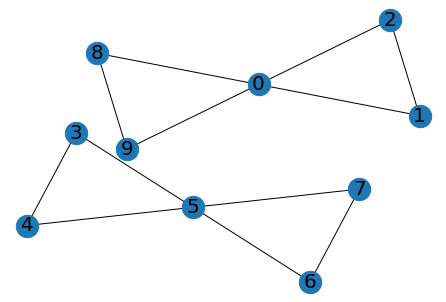

In [600]:
adj = np.array([
		[0, 1, 1, 0, 0, 0, 0, 0, 1, 1],
		[1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
		[1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
		[0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
		[0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 1, 1, 0, 0],
		[0, 0, 0, 0, 0, 1, 0, 1, 0, 0],
		[0, 0, 0, 0, 0, 1, 1, 0, 0, 0],
		[1, 0, 0, 0, 0, 0, 0, 0, 0, 1],
		[1, 0, 0, 0, 0, 0, 0, 0, 1, 0]
	])

n = len(adj[0])
graph = BuildGraph(n, adj)
nx.draw_kamada_kawai(graph, font_size = 20, width = 1, with_labels=True, node_size = 500, arrowsize = 100)
plt.show()

Laplacian: 
[[ 4 -1 -1  0  0  0  0  0 -1 -1]
 [-1  2 -1  0  0  0  0  0  0  0]
 [-1 -1  2  0  0  0  0  0  0  0]
 [ 0  0  0  2 -1 -1  0  0  0  0]
 [ 0  0  0 -1  2 -1  0  0  0  0]
 [ 0  0  0 -1 -1  4 -1 -1  0  0]
 [ 0  0  0  0  0 -1  2 -1  0  0]
 [ 0  0  0  0  0 -1 -1  2  0  0]
 [-1  0  0  0  0  0  0  0  2 -1]
 [-1  0  0  0  0  0  0  0 -1  2]]


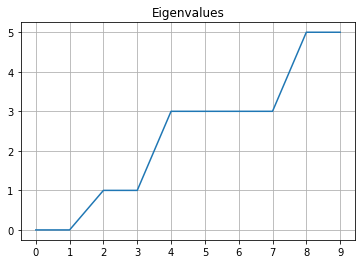

Fiedler value(second eigenvelue):  3.3134615995519985e-16
Fiedler vector(second eigenvector):  [ 0.     0.    -0.    -0.447 -0.447 -0.447 -0.447 -0.447  0.    -0.   ]
Cluster centers: 
 [[-0.4472136]
 [ 0.       ]]
Cluster labels:  [1 1 1 0 0 0 0 0 1 1]


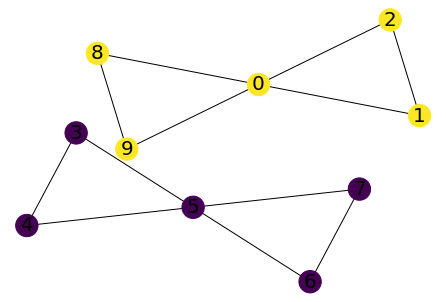

In [601]:
deg = np.diag(adj.sum(axis=1))
laplacian = deg - adj

eigenvalues, eigenvectors = np.linalg.eig(laplacian)

print("Laplacian: ")
print (laplacian)

eigenvectors = eigenvectors[:, np.argsort(eigenvalues)]
eigenvalues = eigenvalues[np.argsort(eigenvalues)]
plt.plot(eigenvalues)
plt.xticks(range(len(eigenvalues)))
plt.grid()
plt.title("Eigenvalues")
plt.show()

print ("Fiedler value(second eigenvelue): ", eigenvalues[1])

kmeans = KMeans(n_clusters=2)
kmeans.fit(eigenvectors[:,1:2])
colors = kmeans.labels_

print ("Fiedler vector(second eigenvector): ", np.round(eigenvectors[:,1], 3))
print ("Cluster centers: \n", kmeans.cluster_centers_)
print ("Cluster labels: ", colors)

nx.draw_kamada_kawai(graph, font_size = 20, width = 1, with_labels=True, node_size = 500, arrowsize = 100, node_color=colors, nodelist=range(0, n))
plt.show()

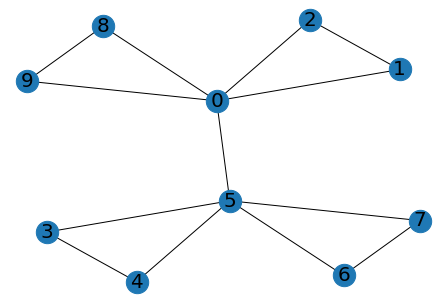

In [602]:
adj = np.array([
		[0, 1, 1, 0, 0, 1, 0, 0, 1, 1],
		[1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
		[1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
		[0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
		[0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
		[1, 0, 0, 1, 1, 0, 1, 1, 0, 0],
		[0, 0, 0, 0, 0, 1, 0, 1, 0, 0],
		[0, 0, 0, 0, 0, 1, 1, 0, 0, 0],
		[1, 0, 0, 0, 0, 0, 0, 0, 0, 1],
		[1, 0, 0, 0, 0, 0, 0, 0, 1, 0]
	])
n = len(adj[0])
graph = BuildGraph(n, adj)
nx.draw_kamada_kawai(graph, font_size = 20, width = 1, with_labels=True, node_size = 500, arrowsize = 100)
plt.show()

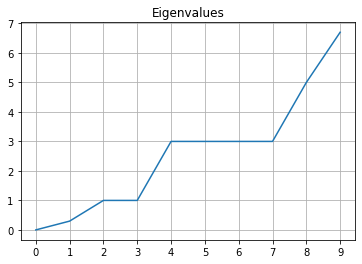

Fiedler value(second eigenvelue):  0.29843788128357546
Fiedler vector(second eigenvector):  [ 0.234  0.334  0.334 -0.334 -0.334 -0.234 -0.334 -0.334  0.334  0.334]
2-Cluster centers: 
 [[-0.31370984]
 [ 0.31370984]]
2-Cluster labels:  [1 1 1 0 0 0 0 0 1 1]


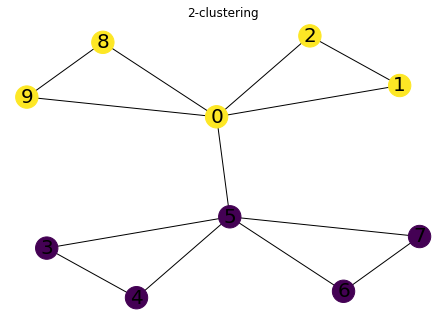

First* 3 eigenvectors:
[ 0.234  0.334  0.334 -0.334 -0.334 -0.234 -0.334 -0.334  0.334  0.334]
[-0.     0.491  0.491 -0.096 -0.096  0.     0.096  0.096 -0.491 -0.491]
[-0.     0.247  0.247  0.435  0.435 -0.    -0.435 -0.435 -0.247 -0.247]
Cluster centers: 
 [[-0.30043441  0.06414246 -0.28993512]
 [ 0.30043441 -0.32710374 -0.16446501]
 [-0.33362299 -0.09621369  0.43490268]
 [ 0.33362299  0.49065561  0.24669751]]
Cluster labels:  [1 3 3 2 2 0 0 0 1 1]


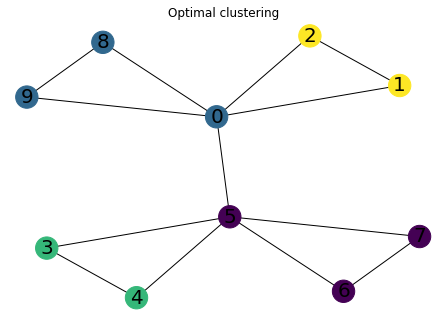

In [603]:
deg = np.diag(adj.sum(axis=1))
laplacian = deg - adj

eigenvalues, eigenvectors = np.linalg.eig(laplacian)

eigenvectors = eigenvectors[:, np.argsort(eigenvalues)]
eigenvalues = eigenvalues[np.argsort(eigenvalues)]
plt.plot(eigenvalues)
plt.xticks(range(len(eigenvalues)))
plt.grid()
plt.title("Eigenvalues")
plt.show()

print ("Fiedler value(second eigenvelue): ", eigenvalues[1])

kmeans = KMeans(n_clusters=2)
kmeans.fit(eigenvectors[:,1:2])
colors = kmeans.labels_

print ("Fiedler vector(second eigenvector): ", np.round(eigenvectors[:,1], 3))
print ("2-Cluster centers: \n", kmeans.cluster_centers_)
print ("2-Cluster labels: ", colors)

nx.draw_kamada_kawai(graph, font_size = 20, width = 1, with_labels=True, node_size = 500, arrowsize = 100, node_color=colors, nodelist=range(0,n))
plt.title("2-clustering")
plt.show()

print ("First* 3 eigenvectors:")
print (np.round(eigenvectors[:,1], 3))
print (np.round(eigenvectors[:,2], 3))
print (np.round(eigenvectors[:,3], 3))

kmeans = KMeans(n_clusters=4)
kmeans.fit(eigenvectors[:,1:4])
colors = kmeans.labels_

print ("Cluster centers: \n", kmeans.cluster_centers_)
print ("Cluster labels: ", colors)

nx.draw_kamada_kawai(graph, font_size = 20, width = 1, with_labels=True, node_size = 500, arrowsize = 100, node_color=colors, nodelist=range(0,n))
plt.title("Optimal clustering")
plt.show()

In [604]:
def spectral_cluster(n, adj, k= 2):
	for i in range(n):
		for j in range(i, n):
			if (adj[i][j] != adj[j][i]):
				adj[i][j] = 1
				adj[j][i] = 1
	graph = BuildGraph(n, adj)

	deg = np.diag(adj.sum(axis=1))
	laplacian = deg - adj

	eigenvalues, eigenvectors = np.linalg.eigh(laplacian)

	eigenvectors = eigenvectors[:, np.argsort(eigenvalues)]
	eigenvalues = eigenvalues[np.argsort(eigenvalues)]

	fig, axs = plt.subplots(1, 2, figsize=(20, 10))

	axs[0].plot(eigenvalues)
	axs[0].xticks(range(len(eigenvalues)))
	axs[0].grid()
	axs[1].plot(eigenvalues[:10])
	axs[1].xticks(range(len(eigenvalues)))
	axs[1].grid()
	fig.suptitle("Eigenvalues")
	plt.show()

	kmeans = KMeans(n_clusters=2)
	kmeans.fit(eigenvectors[:,1:2])
	colors = kmeans.labels_

	return colors

IndentationError: expected an indented block (2451491704.py, line 3)

In [ ]:
from sklearn.datasets import make_circles
from sklearn.neighbors import kneighbors_graph

X, labels = make_circles(n_samples=300, noise=0.12, factor=.2)
adj = kneighbors_graph(X, n_neighbors=7, ).toarray()
n = len(adj)
for i in range(n):
	for j in range(i, n):
		if (adj[i][j] != adj[j][i]):
			adj[i][j] = 1
			adj[j][i] = 1
graph = BuildGraph(n, adj)

deg = np.diag(adj.sum(axis=1))
laplacian = deg - adj

eigenvalues, eigenvectors = np.linalg.eigh(laplacian)

eigenvectors = eigenvectors[:, np.argsort(eigenvalues)]
eigenvalues = eigenvalues[np.argsort(eigenvalues)]
plt.plot(eigenvalues)
plt.xticks(range(len(eigenvalues)))
plt.grid()
plt.title("Eigenvalues")
plt.show()

print (eigenvalues[0:5])
print ("Fiedler value(second eigenvelue): ", eigenvalues[1])

kmeans = KMeans(n_clusters=2)
kmeans.fit(eigenvectors[:,1:2])
colors = kmeans.labels_

from sklearn.metrics import classification_report
print("Spectral clustering accuracy:\n", classification_report(labels, colors))

fig, axs = plt.subplots(1, 3, figsize=(27, 9), subplot_kw=dict(xticks=[], yticks=[]))
nx.draw(graph, font_size = 20, width = 1, with_labels=False, node_size = 50, arrowsize = 100, nodelist=range(0,n), pos= X, ax= axs[0])
axs[1].scatter(X[:,0], X[:,1], c=colors)
nx.draw(graph, font_size = 20, width = 1, with_labels=False, node_size = 50, arrowsize = 100, nodelist=range(0,n), pos= X, node_color=colors, ax = axs[2])
fig.suptitle("Spectral", fontsize=16)
plt.show()

kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
colors = kmeans.labels_

print("K-means clustering accuracy:\n", classification_report(labels, colors))

fig, axs = plt.subplots(1, 3, figsize=(30, 10), subplot_kw=dict(xticks=[], yticks=[]))
axs[0].scatter(X[:,0], X[:,1])
axs[1].scatter(X[:,0], X[:,1], c=colors)
nx.draw(graph, font_size = 20, width = 1, with_labels=False, node_size = 50, arrowsize = 100, nodelist=range(0,n), pos= X, node_color=colors, ax = axs[2])
fig.suptitle("K-means", fontsize=16)
plt.show()

In [ ]:
picture = np.array(Image.open("Im1.tif"))
plt.imshow(picture)

NameError: name 'spectral_cluster' is not defined